# **CSCN8030 - Artificial Intelligence for Business Decisions and Transformation**

### **Group 5**

##### **Prepared By:**
- Harsh Patel - 8885199
- Riddhi Hindocha - 8978659
- Vishv Patel - 8977662

### **Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


### **1. Load the Dataset**

In [2]:
df = pd.read_csv("database.csv")

In [3]:
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

### **2. Data Cleaning**

In [5]:
def process_dataframe(df):
    # Calculate the number of null values in each column
    null_counts = df.isnull().sum()

    # Iterate through columns and decide whether to drop or fill
    for column in df.columns:
        if null_counts[column] > df.shape[0]*0.1:
            # Drop the column if the number of nulls is greater than 10%  pf data
            df = df.drop(column, axis=1)
        else:
            if pd.api.types.is_numeric_dtype(df[column]):
                # Fill missing numeric data with the median of the column
                median_value = df[column].median()
                df[column] = df[column].fillna(median_value)
            else:
                # Fill missing non-numeric data with the most common value
                most_common = df[column].mode().iloc[0]
                df[column] = df[column].fillna(most_common)
    return df

This code processes a DataFrame by handling missing values. It does the following:

1. Calculates the number of null values in each column.
2. Drops columns with more than 10% missing values.
3. Fills missing numeric data with the column's median.
4. Fills missing non-numeric data with the most common value (mode).

**Missing value plot**

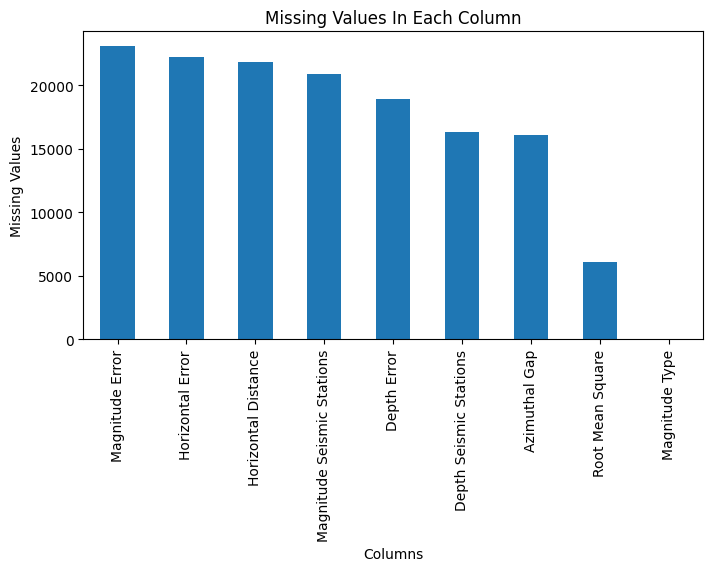

In [6]:
missing_values = df.isna().sum()

# Filter columns with missing values
missing_values = missing_values[missing_values > 0]

# Sort columns by the number of missing values in descending order
missing_values = missing_values.sort_values(ascending=False)

# Create a bar chart to visualize missing values
plt.figure(figsize=(8, 4))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values')
plt.title('Missing Values In Each Column')
plt.xticks(rotation=90)
plt.show()

* The columns `Magnitude Error`, `Horizontal Error`, `Horizontal Distance`, `Magnitude Seismic Stations`, `Depth Error`, `Depth Seismic Stations`, and `Azimuthal Gap` all have **over 15,000** missing values. This high percentage of missing data indicates that these columns may need to be dropped.

In [7]:
df=process_dataframe(df)
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   ID                23412 non-null  object 
 9   Source            23412 non-null  object 
 10  Location Source   23412 non-null  object 
 11  Magnitude Source  23412 non-null  object 
 12  Status            23412 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.3+ MB


In [9]:
# Find the unique values in the 'Type' column
unique_types = df['Type'].unique()
print(f"Unique types: {unique_types}")

Unique types: ['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst']


In [11]:
# Filter the rows where 'Type' is 'Earthquake'
df = df[df['Type'] == 'Earthquake']

# Display the first few rows of the filtered dataset
df

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,US10007NL0,US,US,US,Reviewed


* The code filters the dataset to retain only the rows where the 'Type' column is 'Earthquake', removing all other types such as 'Nuclear Explosion', 'Explosion', and 'Rock Burst'. This results in a dataset containing only earthquake-related data.

### **3. Exploratory Data Analysis**

In [12]:
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,23232.000000,23232.000000,23232.000000,23232.000000
mean,1.386383,39.746049,71.313913,5.882763
std,29.929060,125.751903,122.968384,0.424032
min,-77.080000,-179.997000,-1.100000,5.500000
25%,-18.719500,-76.366500,15.000000,5.600000
50%,-3.680000,106.349000,33.000000,5.700000
75%,24.968500,145.290250,54.800000,6.000000
max,86.005000,179.998000,700.000000,9.100000


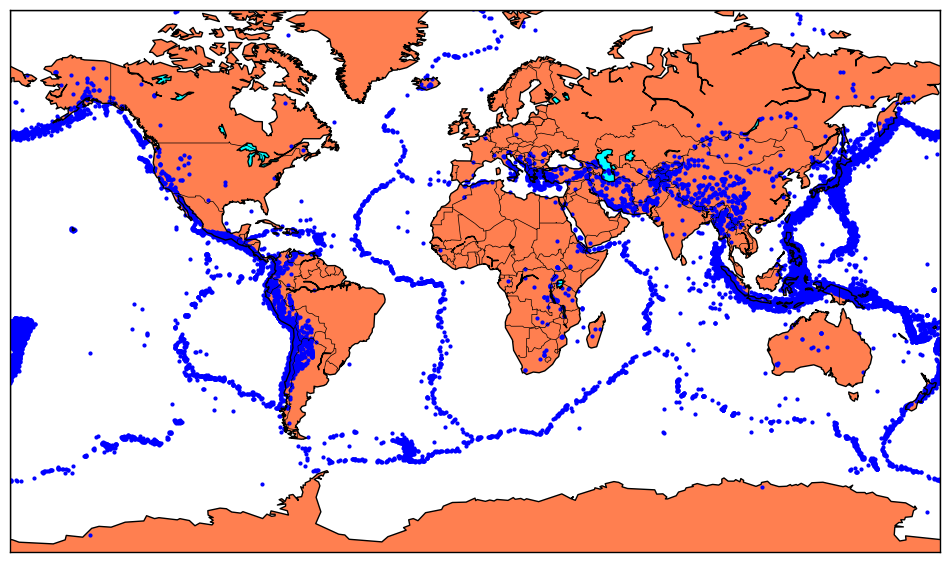

In [49]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
#plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

* The map illustrates the geographical distribution of earthquake occurrences, marked by blue points. 
* These points correspond to the longitude and latitude data in the dataset, showing that earthquakes are frequent along the Pacific Ring of Fire, as well as in regions such as the western coast of the Americas, the Himalayas, the Mediterranean, and parts of Southeast Asia. 
* This visual representation highlights the tectonically active areas where seismic activity is prevalent.

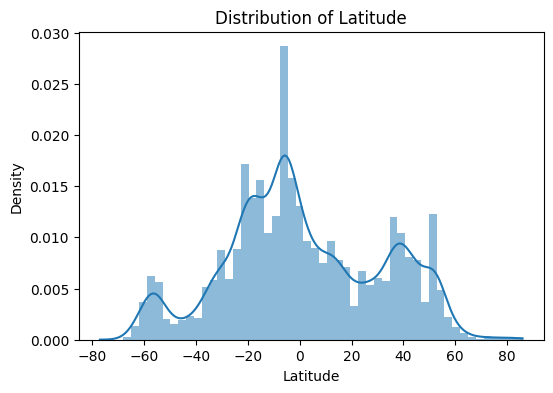

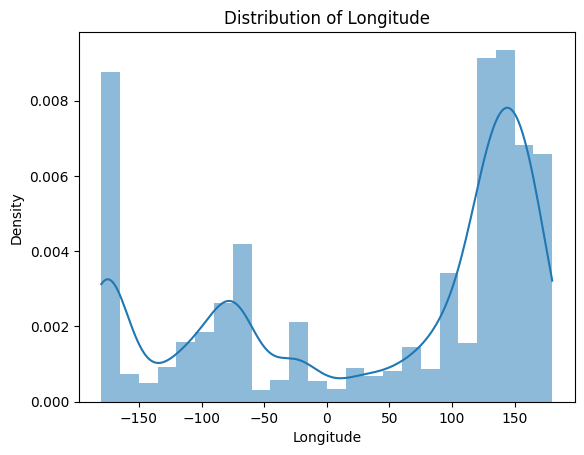

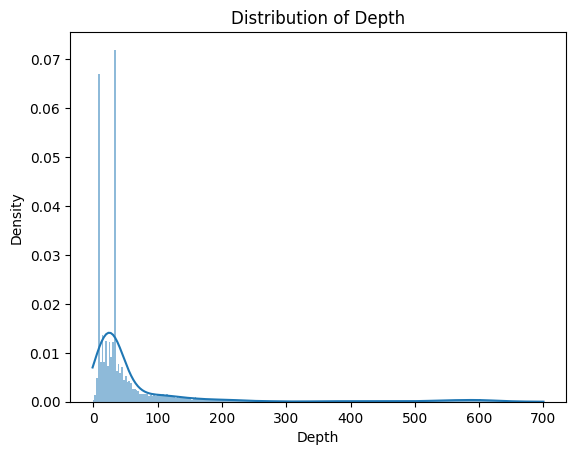

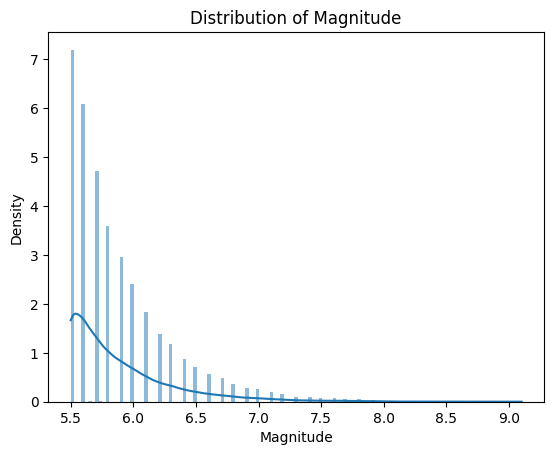

In [22]:
# Plot normal distribution for each numerical column
plt.figure(figsize=(6, 4))
for column in df.select_dtypes(include=['float64', 'int64']):
    sns.histplot(df[column], kde=True, stat="density", linewidth=0)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

* The above charts are for the data distribution of each feature.

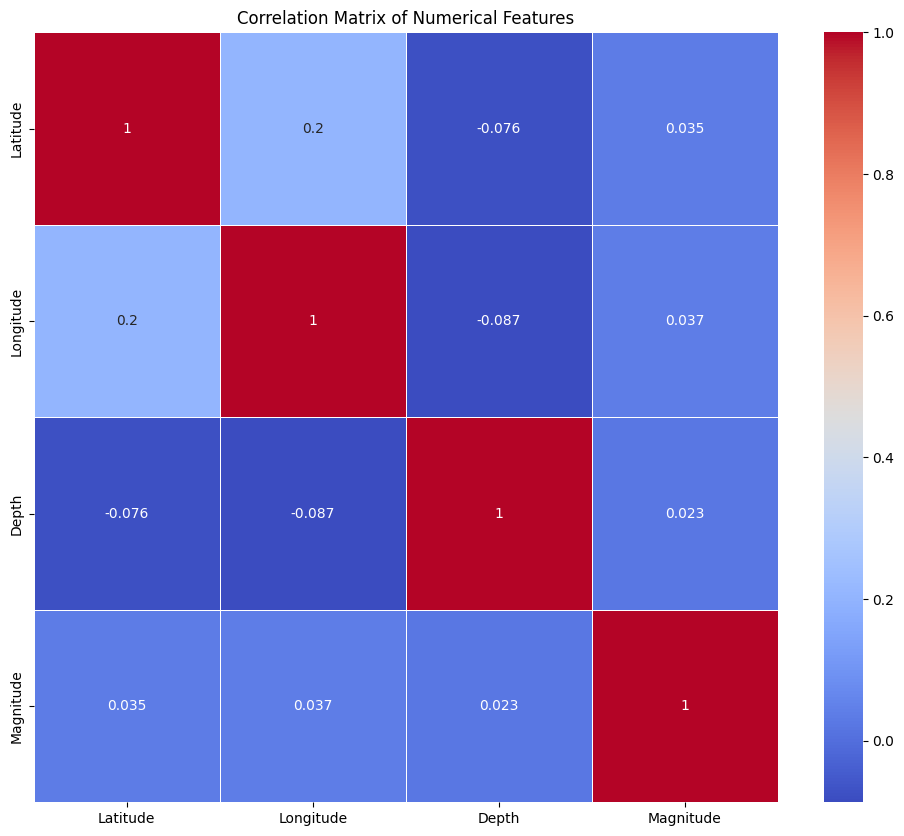

In [23]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

* The correlation matrix shows very weak positive correlations between `Latitude and Magnitude (0.035)`, `Longitude and Magnitude (0.037)`, and `Depth and Magnitude (0.023)`, respectively, indicating minimal linear relationships between these features and the target variable.

### **4. Features Engineering**

In [24]:
data = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [25]:
# Create a new DataFrame from the main DataFrame
new_data = data.copy()

new_data['Datetime'] = pd.to_datetime(new_data['Date'] + ' ' + new_data['Time'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
new_data = new_data.drop(columns=['Date', 'Time'])
new_data = new_data.dropna(subset=['Datetime'])  # Drop rows where datetime conversion failed
new_data['Timestamp'] = new_data['Datetime'].astype('int64') // 10**9  # Convert to Unix timestamp

final_data = new_data.drop(columns=['Datetime'])
final_data


,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.2460,145.6160,131.60,6.0,-157630542
1,1.8630,127.3520,80.00,5.8,-157465811
2,-20.5790,-173.9720,20.00,6.2,-157355642
3,-59.0760,-23.5570,15.00,5.8,-157093817
4,11.9380,126.4270,15.00,5.8,-157026430
...,...,...,...,...,...
23407,38.3917,-118.8941,12.30,5.6,1482913332
23408,38.3777,-118.8957,8.80,5.5,1482916427
23409,36.9179,140.4262,10.00,5.9,1482928731
23410,-9.0283,118.6639,79.00,6.3,1483050619


* This code combines the 'Date' and 'Time' columns into a single 'Datetime' column, converting it to datetime format and dropping any rows where conversion fails. It then converts the 'Datetime' column to Unix timestamp format and adds it as a new column named 'Timestamp'. 

### **5. Splitting the Data**

In [26]:
# Split the data
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the target variables
y_train_magnitude = y_train['Magnitude']
y_test_magnitude = y_test['Magnitude']
y_train_depth = y_train['Depth']
y_test_depth = y_test['Depth']

#Splitted Data
print('X_scaled_train shape is ' , X_train.shape)
print('X_scaled_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_scaled_train shape is  (18583, 3)
X_scaled_test shape is  (4646, 3)
y_train shape is  (18583, 2)
y_test shape is  (4646, 2)


### **6. Model Training and Evaluation**

##### **i. Random Forest Regressor**

In [27]:
# Define the model
rf_magnitude_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_depth_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_magnitude_model.fit(X_train, y_train_magnitude)
rf_depth_model.fit(X_train, y_train_depth)


RandomForestRegressor(random_state=42)

In [28]:
# Predict on the test set
y_pred_magnitude_rf = rf_magnitude_model.predict(X_test)
y_pred_depth_rf = rf_depth_model.predict(X_test)

# Evaluate the model

# MAE
# Calculate MAE for both outputs
magnitude_mae_rf = mean_absolute_error(y_test_magnitude, y_pred_magnitude_rf)
depth_mae_rf = mean_absolute_error(y_test_depth, y_pred_depth_rf)

print(f"Mean Absolute Error for Magnitude Prediction: {magnitude_mae_rf}")
print(f"Mean Absolute Error for Depth Prediction: {depth_mae_rf}")

# MSE
magnitude_mse_rf = mean_squared_error(y_test_magnitude, y_pred_magnitude_rf)
depth_mse_rf = mean_squared_error(y_test_depth, y_pred_depth_rf)

print(f"Mean Squared Error for Magnitude Prediction: {magnitude_mse_rf}")
print(f"Mean Squared Error for Depth Prediction: {depth_mse_rf}")


Mean Absolute Error for Magnitude Prediction: 0.3209811881188122
Mean Absolute Error for Depth Prediction: 20.045290495049507
Mean Squared Error for Magnitude Prediction: 0.18451526127851914
Mean Squared Error for Depth Prediction: 2163.5899889116818


1. Mean Absolute Error (MAE):

* Magnitude Prediction: 0.32098
* Depth Prediction: 20.04529
* MAE represents the average absolute difference between predicted values and actual values.

2. Mean Squared Error (MSE):

* Magnitude Prediction: 0.18452
* Depth Prediction: 2163.58999
* MSE measures the average of the squares of the errors between predicted values and actual values.

**ii Support Vector Regressor**

In [29]:
# Define the SVR models
svr_magnitude_model = SVR(kernel='rbf')
svr_depth_model = SVR(kernel='rbf')

# Train the models
svr_magnitude_model.fit(X_train, y_train_magnitude)
svr_depth_model.fit(X_train, y_train_depth)


SVR()

In [30]:
# Predict on the test set
y_magnitude_pred_svr = svr_magnitude_model.predict(X_test)
y_depth_pred_svr = svr_depth_model.predict(X_test)

# Calculate MAE for both outputs
magnitude_mae_svr = mean_absolute_error(y_test_magnitude, y_magnitude_pred_svr)
depth_mae_svr = mean_absolute_error(y_test_depth, y_depth_pred_svr)

print(f"Mean Absolute Error for Magnitude Prediction: {magnitude_mae_svr}")
print(f"Mean Absolute Error for Depth Prediction: {depth_mae_svr}")

# Calculate MSE for both outputs
magnitude_mse_svr = mean_squared_error(y_test_magnitude, y_magnitude_pred_svr)
depth_mse_svr = mean_squared_error(y_test_depth, y_depth_pred_svr)

print(f"Mean Squared Error for Magnitude Prediction: {magnitude_mse_svr}")
print(f"Mean Squared Error for Depth Prediction: {depth_mse_svr}")

Mean Absolute Error for Magnitude Prediction: 0.29016452515119373
Mean Absolute Error for Depth Prediction: 52.59899769197009
Mean Squared Error for Magnitude Prediction: 0.17709069957714477
Mean Squared Error for Depth Prediction: 16626.04417654655


1. Mean Absolute Error (MAE):

* Magnitude Prediction: 0.29016
* Depth Prediction: 52.599

2. Mean Squared Error (MSE):

* Magnitude Prediction: 0.17709
* Depth Prediction: 16626.04418

**Save the Model**

In [32]:
# Save the model to a file
filename = 'svr_magnitude_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(svr_magnitude_model, file)

print(f'Model saved to {filename}')

Model saved to svr_magnitude_model.pkl


##### **ii. Gradient Boosting Regressor**

In [33]:
# Define the base model
base_gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Define the multi-output regressor
model_gb = MultiOutputRegressor(base_gb_model)

# Train the model
model_gb.fit(X_train, y_train)


MultiOutputRegressor(estimator=GradientBoostingRegressor(random_state=42))

In [34]:
# Predict on the test set
y_pred_gb = model_gb.predict(X_test)

# Split the predictions into magnitude and depth
y_pred_gb_magnitude = y_pred_gb[:, 0]
y_pred_gb_depth = y_pred_gb[:, 1]

# MAE
# Calculate MAE for both outputs
gb_magnitude_mae = mean_absolute_error(y_test_magnitude, y_pred_gb_magnitude)
gb_depth_mae = mean_absolute_error(y_test_depth, y_pred_gb_depth)

print(f"Mean Absolute Error for Magnitude Prediction: {gb_magnitude_mae}")
print(f"Mean Absolute Error for Depth Prediction: {gb_depth_mae}")

# MSE
gb_magnitude_mse = mean_squared_error(y_test_magnitude, y_pred_gb_magnitude)
gb_depth_mse = mean_squared_error(y_test_depth, y_pred_gb_depth)

print(f"Mean Squared Error for Magnitude Prediction: {gb_magnitude_mse}")
print(f"Mean Squared Error for Depth Prediction: {gb_depth_mse}")


Mean Absolute Error for Magnitude Prediction: 0.3049718281572518
Mean Absolute Error for Depth Prediction: 41.59061870503693
Mean Squared Error for Magnitude Prediction: 0.16467903320737828
Mean Squared Error for Depth Prediction: 5642.191370982856


1. Mean Absolute Error (MAE):

* Magnitude Prediction: 0.30497
* Depth Prediction: 41.59062

2. Mean Squared Error (MSE):

* Magnitude Prediction: 0.16468
* Depth Prediction: 5642.19137

**iv. Neural Networks**

In [44]:
nn_model = Sequential()
nn_model.add(Dense(16, activation='relu', input_shape=(3,)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(2, activation='softmax'))
nn_model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])

In [45]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 2/20
465/465 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 3/20
465/465 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 4/20
465/465 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 5/20
465/465 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 6/20
465/465 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 7/20
465/465 [==============================] - 1s 1ms/step - loss: 0.5002 - accuracy: 0.9245 - val_loss: 0.5001 - val_accuracy: 0.9298
Epoch 

In [46]:
[test_loss, test_acc] = nn_model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

146/146 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.9292
Evaluation result on Test Data : Loss = 0.5005843639373779, accuracy = 0.9291864037513733


In [47]:
# Predict on the test set
y_pred_nn = nn_model.predict(X_test)

# Split the predictions into magnitude and depth
y_pred_magnitude_nn = y_pred_nn[:, 0]
y_pred_depth_nn = y_pred_nn[:, 1]

nn_magnitude_mae = mean_absolute_error(y_test_magnitude, y_pred_magnitude_nn)
nn_depth_mae = mean_absolute_error(y_test_depth, y_pred_depth_nn)

print(f"Mean Absolute Error for Magnitude Prediction: {nn_magnitude_mae}")
print(f"Mean Absolute Error for Depth Prediction: {nn_depth_mae}")

nn_magnitude_mse = mean_squared_error(y_test_magnitude, y_pred_magnitude_nn)
nn_depth_mse = mean_squared_error(y_test_depth, y_pred_depth_nn)

print(f"Mean Squared Error for Magnitude Prediction: {nn_magnitude_mse}")
print(f"Mean Squared Error for Depth Prediction: {nn_depth_mse}")


146/146 [==============================] - 0s 864us/step
Mean Absolute Error for Magnitude Prediction: 5.821887645286267
Mean Absolute Error for Depth Prediction: 69.97278088678432
Mean Squared Error for Magnitude Prediction: 34.09652064141196
Mean Squared Error for Depth Prediction: 19875.350810091262


| Model                   | MAE (Magnitude) | MAE (Depth) | MSE (Magnitude) | MSE (Depth) |
|-------------------------|-----------------|-------------|-----------------|-------------|
| Random Forest Regressor | 0.32098         | 20.04529    | 0.18452         | 2163.58999  |
| Support Vector Regressor| 0.29016         | 52.599      | 0.17709         | 16626.04418 |
| Gradient Boosting Regressor| 0.30497     | 41.59062    | 0.16468         | 5642.19137  |
| Neural Network          | 5.82188         | 69.97278    | 34.0965        | 19875.35081 |
